In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests

In [238]:
import pandas as pd

In [316]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
page_count = (int(review_count) // 20) + 1

In [361]:
# necessary for Yelp

# includes Qype users
lemon_reviewer_name = 'lemon--div__373c0__1mboc sidebarActionsHoverTarget__373c0__2kfhE arrange__373c0__UHqhV gutter-12__373c0__3kguh grid__373c0__29zUk layout-stack-small__373c0__3cHex border-color--default__373c0__2oFDT'
lemon_reviewer_url = 'lemon--a__373c0__IEZFH link__373c0__29943 link-color--blue-dark__373c0__1mhJo link-size--default__373c0__1skgq'
lemon_reviewer_stars = 'lemon--div__373c0__1mboc arrange-unit__373c0__1piwO arrange-unit-grid-column--8__373c0__2yTAx border-color--default__373c0__2oFDT'
lemon_review_date = 'lemon--span__373c0__3997G text__373c0__2pB8f text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_'
lemon_review_text = 'lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_'

In [314]:
URL = 'https://www.yelp.com/biz/l-and-b-spumoni-gardens-brooklyn'

page = requests.get(URL)
soup = BeautifulSoup(page.text, 'html.parser')
body = soup.body
review_count = body.find('p', class_ = 'lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_ text-size--large__373c0__1568g').text.split(' ')[0]
page_count = (int(review_count) // 20) + 1

In [386]:
YURL = URL + '?start='

df_pizza = pd.DataFrame()

for i in tqdm(range(page_count)):
    count = i * 20
    page = requests.get(YURL + str(count))
    soup = BeautifulSoup(page.text, 'html.parser')
    reviews = soup.body.find('div', class_ = 'lemon--div__373c0__1mboc spinner-container__373c0__N6Hff border-color--default__373c0__2oFDT')
    
    df_add = pd.DataFrame()

    lemon_reviewer_names = reviews.findAll('div', class_ = lemon_reviewer_name)
    
    df_add['reviewer_name'] = [None] * len(lemon_reviewer_names)
    df_add['reviewer_url'] = [None] * len(lemon_reviewer_names)
    
    for k in range(len(lemon_reviewer_names)):
        df_add['reviewer_name'][k] = lemon_reviewer_names[k].find('div', class_ = 'lemon--div__373c0__1mboc user-passport-info border-color--default__373c0__2oFDT').span.text
        try:
            df_add['reviewer_url'][k] = lemon_reviewer_names[k].a['href']
        except:
            df_add['reviewer_url'][k] = ''
    
    df_add['reviewer_star'] = [int(x.div.div.div.div['aria-label'].split(' ')[0]) for x in reviews.findAll('div', {'class' : lemon_reviewer_stars})[1:]]
    df_add['reviewer_date'] = [x.div.div.find('span', class_ = lemon_review_date).text for x in reviews.findAll('div', {'class' : lemon_reviewer_stars})[1:]]
    df_add['reviewer_text'] = [x.text for x in reviews.findAll('p', class_ = lemon_review_text)]
    
    df_pizza = pd.concat([df_pizza, df_add])
        
df_pizza['reviewer_date'] = pd.to_datetime(df_pizza.reviewer_date)
df_pizza.sort_values('reviewer_date', inplace = True, ascending = True)
df_pizza.reset_index(inplace = True, drop = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [388]:
df_pizza['yelp_score'] = [None] * len(df_pizza)
for i in range(len(df_pizza)):
    df_pizza['yelp_score'][i] = df_pizza.reviewer_star[:i + 1].mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


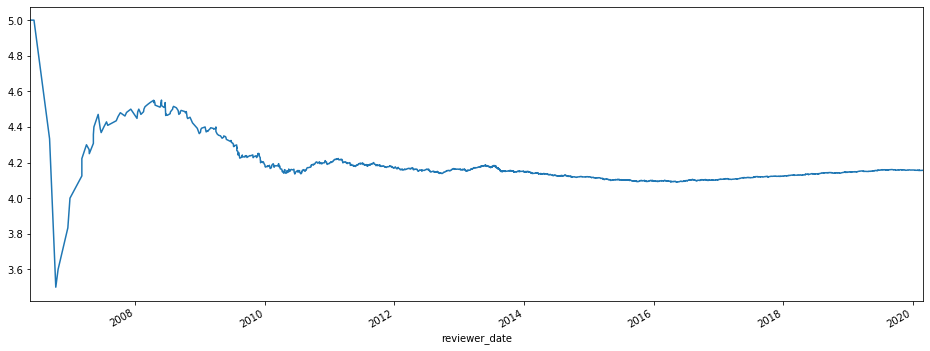

In [389]:
df_pizza.set_index('reviewer_date').yelp_score.plot(figsize = (16,6));

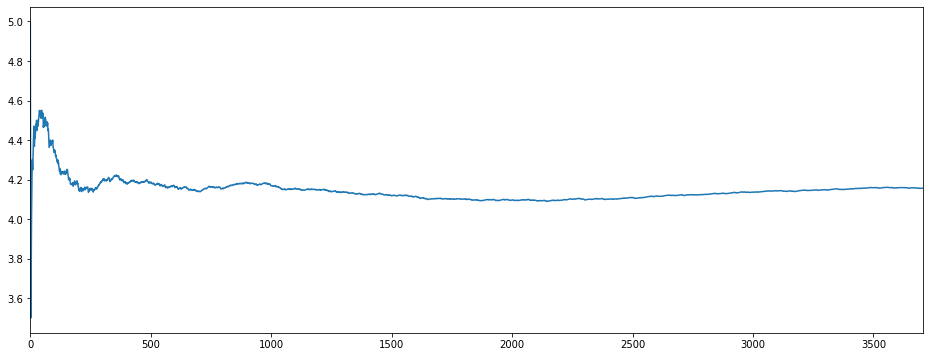

In [390]:
df_pizza.yelp_score.plot(figsize = (16,6));

In [391]:
df_pizza

,reviewer_name,reviewer_url,reviewer_star,reviewer_date,reviewer_text,yelp_score
0,Maryanne N.,/user_details?userid=G9M526-moQ4yZTG-h4ZJTQ,5,2006-05-17,This is about as Brooklyn as you can get! I me...,5
1,Marcella V.,/user_details?userid=NJ4PuVjuByTdDHwzjNRnDQ,5,2006-06-08,THIS is Sicilian pizza! I hate overly-cheesy ...,5
2,Stewart W.,/user_details?userid=WJr_Uhx2OeoTg1V2AaDLwQ,3,2006-09-04,It is very hard to get more Brooklyn than Spum...,4.33333
3,Anthony G.,/user_details?userid=Z9NUqMNiI3lNw3O4xjwjlw,1,2006-10-09,This family has been ripping people off for 65...,3.5
4,Scott Y.,/user_details?userid=ChKHMb5xCCjO99vac3MhnQ,4,2006-10-22,The kind of place that you don't know exists u...,3.6
...,...,...,...,...,...,...
3701,Michelle D.,/user_details?userid=0BU6phHRgI6IDt94jkmCJw,5,2020-02-22,Visited post Valentine's Day with the hubby. F...,4.15613
3702,Melissa P.,/user_details?userid=DqW1JLBQIc3i0rrkXCwHew,5,2020-02-25,Always a pleasure to eat here. I've been comin...,4.15636
3703,Kira K.,/user_details?userid=Dsx3IP2hpWOL7vqCjHH76g,4,2020-02-27,This place is pretty nice for the summer time....,4.15632
3704,Shannon M.,/user_details?userid=Y8VcAidoUsBrjLCuRbG-kg,5,2020-02-27,Do everyone a favor make the drive to this spo...,4.15655
